In [ ]:
#Import libraries and load dataset from own github
import pandas as pd
brfss = pd.read_csv("https://raw.githubusercontent.com/bhusal-ujjwal/time_series/main/ITEC610_assessment3_data.csv")

In [ ]:
#view dataset details
brfss

,Unnamed: 0,age,weight2,wtyrago,wtkg2,htm3,sex
0,0,39.0,88.636364,88.636364,88.64,180.0,1
1,1,64.0,75.000000,84.545455,75.00,155.0,2
2,2,87.0,61.818182,63.636364,61.82,NaN,2
3,3,51.0,100.000000,100.000000,100.00,183.0,1
4,4,35.0,63.636364,61.363636,63.64,170.0,2
...,...,...,...,...,...,...,...
414504,414504,NaN,NaN,NaN,NaN,170.0,2
414505,414505,62.0,86.363636,NaN,86.36,168.0,2
414506,414506,75.0,59.090909,63.636364,59.09,165.0,2
414507,414507,NaN,NaN,NaN,NaN,NaN,2


In [ ]:
#shape of the dateset
brfss.shape

(414509, 7)

In [ ]:
# view column details to check null values
brfss.info(max_cols=1147)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414509 entries, 0 to 414508
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  414509 non-null  int64  
 1   age         410856 non-null  float64
 2   weight2     398484 non-null  float64
 3   wtyrago     390399 non-null  float64
 4   wtkg2       398484 non-null  float64
 5   htm3        409129 non-null  float64
 6   sex         414509 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 22.1 MB


In [ ]:
#fill the null values with mean value as well.
brfss.drop(columns=['Unnamed: 0'], inplace=True)
brfss["age"] = brfss["age"].fillna(brfss["age"].mean())
brfss["weight2"] = brfss["weight2"].fillna(brfss["weight2"].mean())
brfss["wtyrago"] = brfss["wtyrago"].fillna(brfss["wtyrago"].mean())
brfss["wtkg2"] = brfss["wtkg2"].fillna(brfss["wtkg2"].mean())
brfss["htm3"] = brfss["htm3"].fillna(brfss["htm3"].mean())

print(brfss)

             age     weight2     wtyrago       wtkg2       htm3  sex
0       39.00000   88.636364   88.636364   88.640000  180.00000    1
1       64.00000   75.000000   84.545455   75.000000  155.00000    2
2       87.00000   61.818182   63.636364   61.820000  168.82519    2
3       51.00000  100.000000  100.000000  100.000000  183.00000    1
4       35.00000   63.636364   61.363636   63.640000  170.00000    2
...          ...         ...         ...         ...        ...  ...
414504  54.86218   78.992337   79.721319   78.992453  170.00000    2
414505  62.00000   86.363636   79.721319   86.360000  168.00000    2
414506  75.00000   59.090909   63.636364   59.090000  165.00000    2
414507  54.86218   78.992337   79.721319   78.992453  168.82519    2
414508  54.86218   78.992337   79.721319   78.992453  168.82519    2

[414509 rows x 6 columns]


In [ ]:
# Remove duplicate entries
brfss.drop_duplicates(inplace=True)

In [ ]:
# Data after preprocessing
brfss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248853 entries, 0 to 414505
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   age      248853 non-null  float64
 1   weight2  248853 non-null  float64
 2   wtyrago  248853 non-null  float64
 3   wtkg2    248853 non-null  float64
 4   htm3     248853 non-null  float64
 5   sex      248853 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 13.3 MB


In [ ]:
# Renaming columns for clarity
brfss.rename(columns={'weight2': 'current_weight', 'wtyrago': 'weight_a_year_ago','wtkg2': 'weight_2decimal', 'htm3': 'height'}, inplace=True)

In [ ]:
# Data after renaming columns
brfss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248853 entries, 0 to 414505
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   age                248853 non-null  float64
 1   current_weight     248853 non-null  float64
 2   weight_a_year_ago  248853 non-null  float64
 3   weight_2decimal    248853 non-null  float64
 4   height             248853 non-null  float64
 5   sex                248853 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 13.3 MB


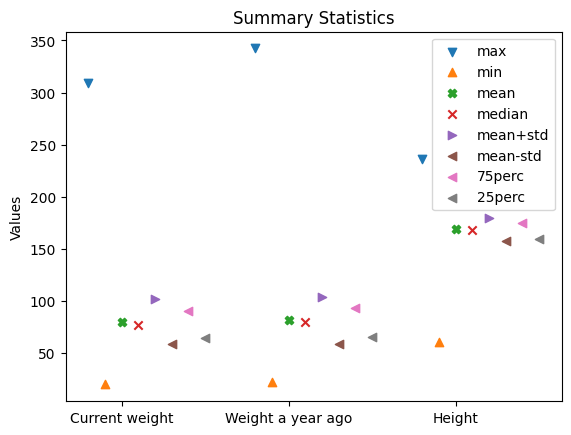

In [ ]:
#Task 1 summary statistics graph
import numpy as np
import matplotlib.pyplot as plt
summary_stats = {}
for column in ['current_weight', 'weight_a_year_ago', 'height']:
    summary_stats[column] = {
        'mean': brfss[column].mean(),
        'median': brfss[column].median(),
        'std': brfss[column].std(),
        '25perc': brfss[column].quantile(0.25),
        '75perc': brfss[column].quantile(0.75),
        'min': brfss[column].min(),
        'max': brfss[column].max(),
    }

# Step 4: Plot the summary statistics
fig, ax = plt.subplots()

x_labels = ['Current weight', 'Weight a year ago', 'Height']
x = np.arange(len(x_labels))
width = 0.1  # the width of the bars

# Define the positions of the points to be plotted
positions = {
    'max': x - 2*width,
    'min': x - width,
    'mean': x,
    'median': x + width,
    'mean+std': x + 2*width,
    'mean-std': x + 3*width,
    '75perc': x + 4*width,
    '25perc': x + 5*width,
}

# Plotting the points
for stat, pos in positions.items():
    if '+' in stat or '-' in stat:
        if '+' in stat:
            values = [summary_stats[col]['mean'] + summary_stats[col]['std'] for col in summary_stats]
        else:
            values = [summary_stats[col]['mean'] - summary_stats[col]['std'] for col in summary_stats]
    else:
        values = [summary_stats[col][stat] for col in summary_stats]
    marker = 'v' if stat == 'max' else '^' if stat == 'min' else 'X' if stat == 'mean' else 'x' if stat == 'median' else '>' if '+' in stat else '<'
    ax.scatter(pos, values, marker=marker, label=stat)

# Adding labels, legend and title
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.set_ylabel('Values')
ax.set_title('Summary Statistics')
ax.legend()

# Display the plot
plt.show()

Correlation between weight_change and current_weight: 0.11554745744635689
Correlation between weight_change and weight_a_year_ago: -0.32218417335667504
Correlation between weight_change and age: -0.08348257981751567


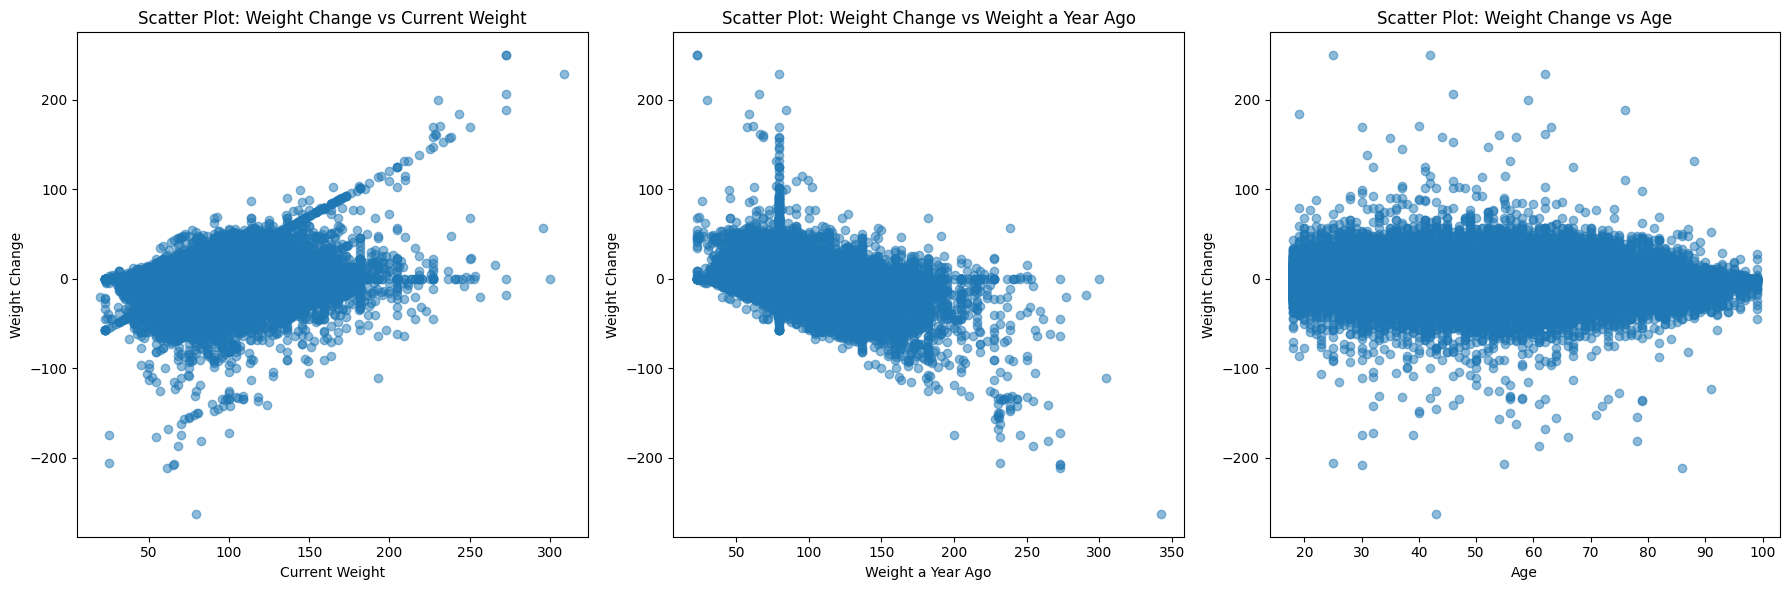

In [ ]:
# Task 2: Calculate correlation
# Calculate weight_change
brfss['weight_change'] = brfss['current_weight'] - brfss['weight_a_year_ago']

# Calculate correlation
correlation_current_weight = brfss['weight_change'].corr(brfss['current_weight'])
correlation_weight_a_year_ago = brfss['weight_change'].corr(brfss['weight_a_year_ago'])
correlation_age = brfss['weight_change'].corr(brfss['age'])

print("Correlation between weight_change and current_weight:", correlation_current_weight)
print("Correlation between weight_change and weight_a_year_ago:", correlation_weight_a_year_ago)
print("Correlation between weight_change and age:", correlation_age)

# Plot scatter plots
plt.figure(figsize=(18, 6))

# Scatter plot for current_weight
plt.subplot(1, 3, 1)
plt.scatter(brfss['current_weight'], brfss['weight_change'], alpha=0.5)
plt.title('Scatter Plot: Weight Change vs Current Weight')
plt.xlabel('Current Weight')
plt.ylabel('Weight Change')

# Scatter plot for weight_a_year_ago
plt.subplot(1, 3, 2)
plt.scatter(brfss['weight_a_year_ago'], brfss['weight_change'], alpha=0.5)
plt.title('Scatter Plot: Weight Change vs Weight a Year Ago')
plt.xlabel('Weight a Year Ago')
plt.ylabel('Weight Change')

# Scatter plot for age
plt.subplot(1, 3, 3)
plt.scatter(brfss['age'], brfss['weight_change'], alpha=0.5)
plt.title('Scatter Plot: Weight Change vs Age')
plt.xlabel('Age')
plt.ylabel('Weight Change')

plt.tight_layout()
plt.show()

In [ ]:
# Task 3
from sklearn.linear_model import LinearRegression

# Given data
house_sizes = [[1500], [2000], [2500], [3000], [3500]]
house_prices = [250000, 300000, 330000, 360000, 390000]

# Create and train the linear regression model
model = LinearRegression()
model.fit(house_sizes, house_prices)

# Predict house price for 2500 sqft
predicted_price_2500 = model.predict([[2500]])

print("Predicted price for a house with 2500 sqft:", predicted_price_2500[0])

Predicted price for a house with 2500 sqft: 326000.0
